# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 1.0)

%matplotlib inline

# Set Options For Display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")

# Loading The Dataset

In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# EDA

In [3]:
#removing id column
df.drop(columns = "Time", inplace = True)

In [4]:
#reading first 10 rows of the data
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0
5,-0.43,0.96,1.14,-0.17,0.42,-0.03,0.48,0.26,-0.57,-0.37,1.34,0.36,-0.36,-0.14,0.52,0.40,-0.06,0.07,-0.03,0.08,-0.21,-0.56,-0.03,-0.37,-0.23,0.11,0.25,0.08,3.67,0
6,1.23,0.14,0.05,1.20,0.19,0.27,-0.01,0.08,0.46,-0.10,-1.42,-0.15,-0.75,0.17,0.05,-0.44,0.00,-0.61,-0.05,-0.22,-0.17,-0.27,-0.15,-0.78,0.75,-0.26,0.03,0.01,4.99,0
7,-0.64,1.42,1.07,-0.49,0.95,0.43,1.12,-3.81,0.62,1.25,-0.62,0.29,1.76,-1.32,0.69,-0.08,-1.22,-0.36,0.32,-0.16,1.94,-1.02,0.06,-0.65,-0.42,-0.05,-1.21,-1.09,40.80,0
8,-0.89,0.29,-0.11,-0.27,2.67,3.72,0.37,0.85,-0.39,-0.41,-0.71,-0.11,-0.29,0.07,-0.33,-0.21,-0.50,0.12,0.57,0.05,-0.07,-0.27,-0.20,1.01,0.37,-0.38,0.01,0.14,93.20,0
9,-0.34,1.12,1.04,-0.22,0.50,-0.25,0.65,0.07,-0.74,-0.37,1.02,0.84,1.01,-0.44,0.15,0.74,-0.54,0.48,0.45,0.20,-0.25,-0.63,-0.12,-0.39,-0.07,0.09,0.25,0.08,3.68,0


In [5]:
#data types in the data
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
# checking if the data is unbalanced
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
#null values
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [9]:
#statistical measures
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [10]:
#shape of the data
df.shape

(284807, 30)

In [11]:
#duplicated lines
df.duplicated().sum()

9144

In [12]:
#correlation between the numerical columns
df.iloc[:, : -1].corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23
V2,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53
V3,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21
V4,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10
V5,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39
V6,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22
V7,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40
V8,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10
V9,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04
V10,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.10


<Axes: >

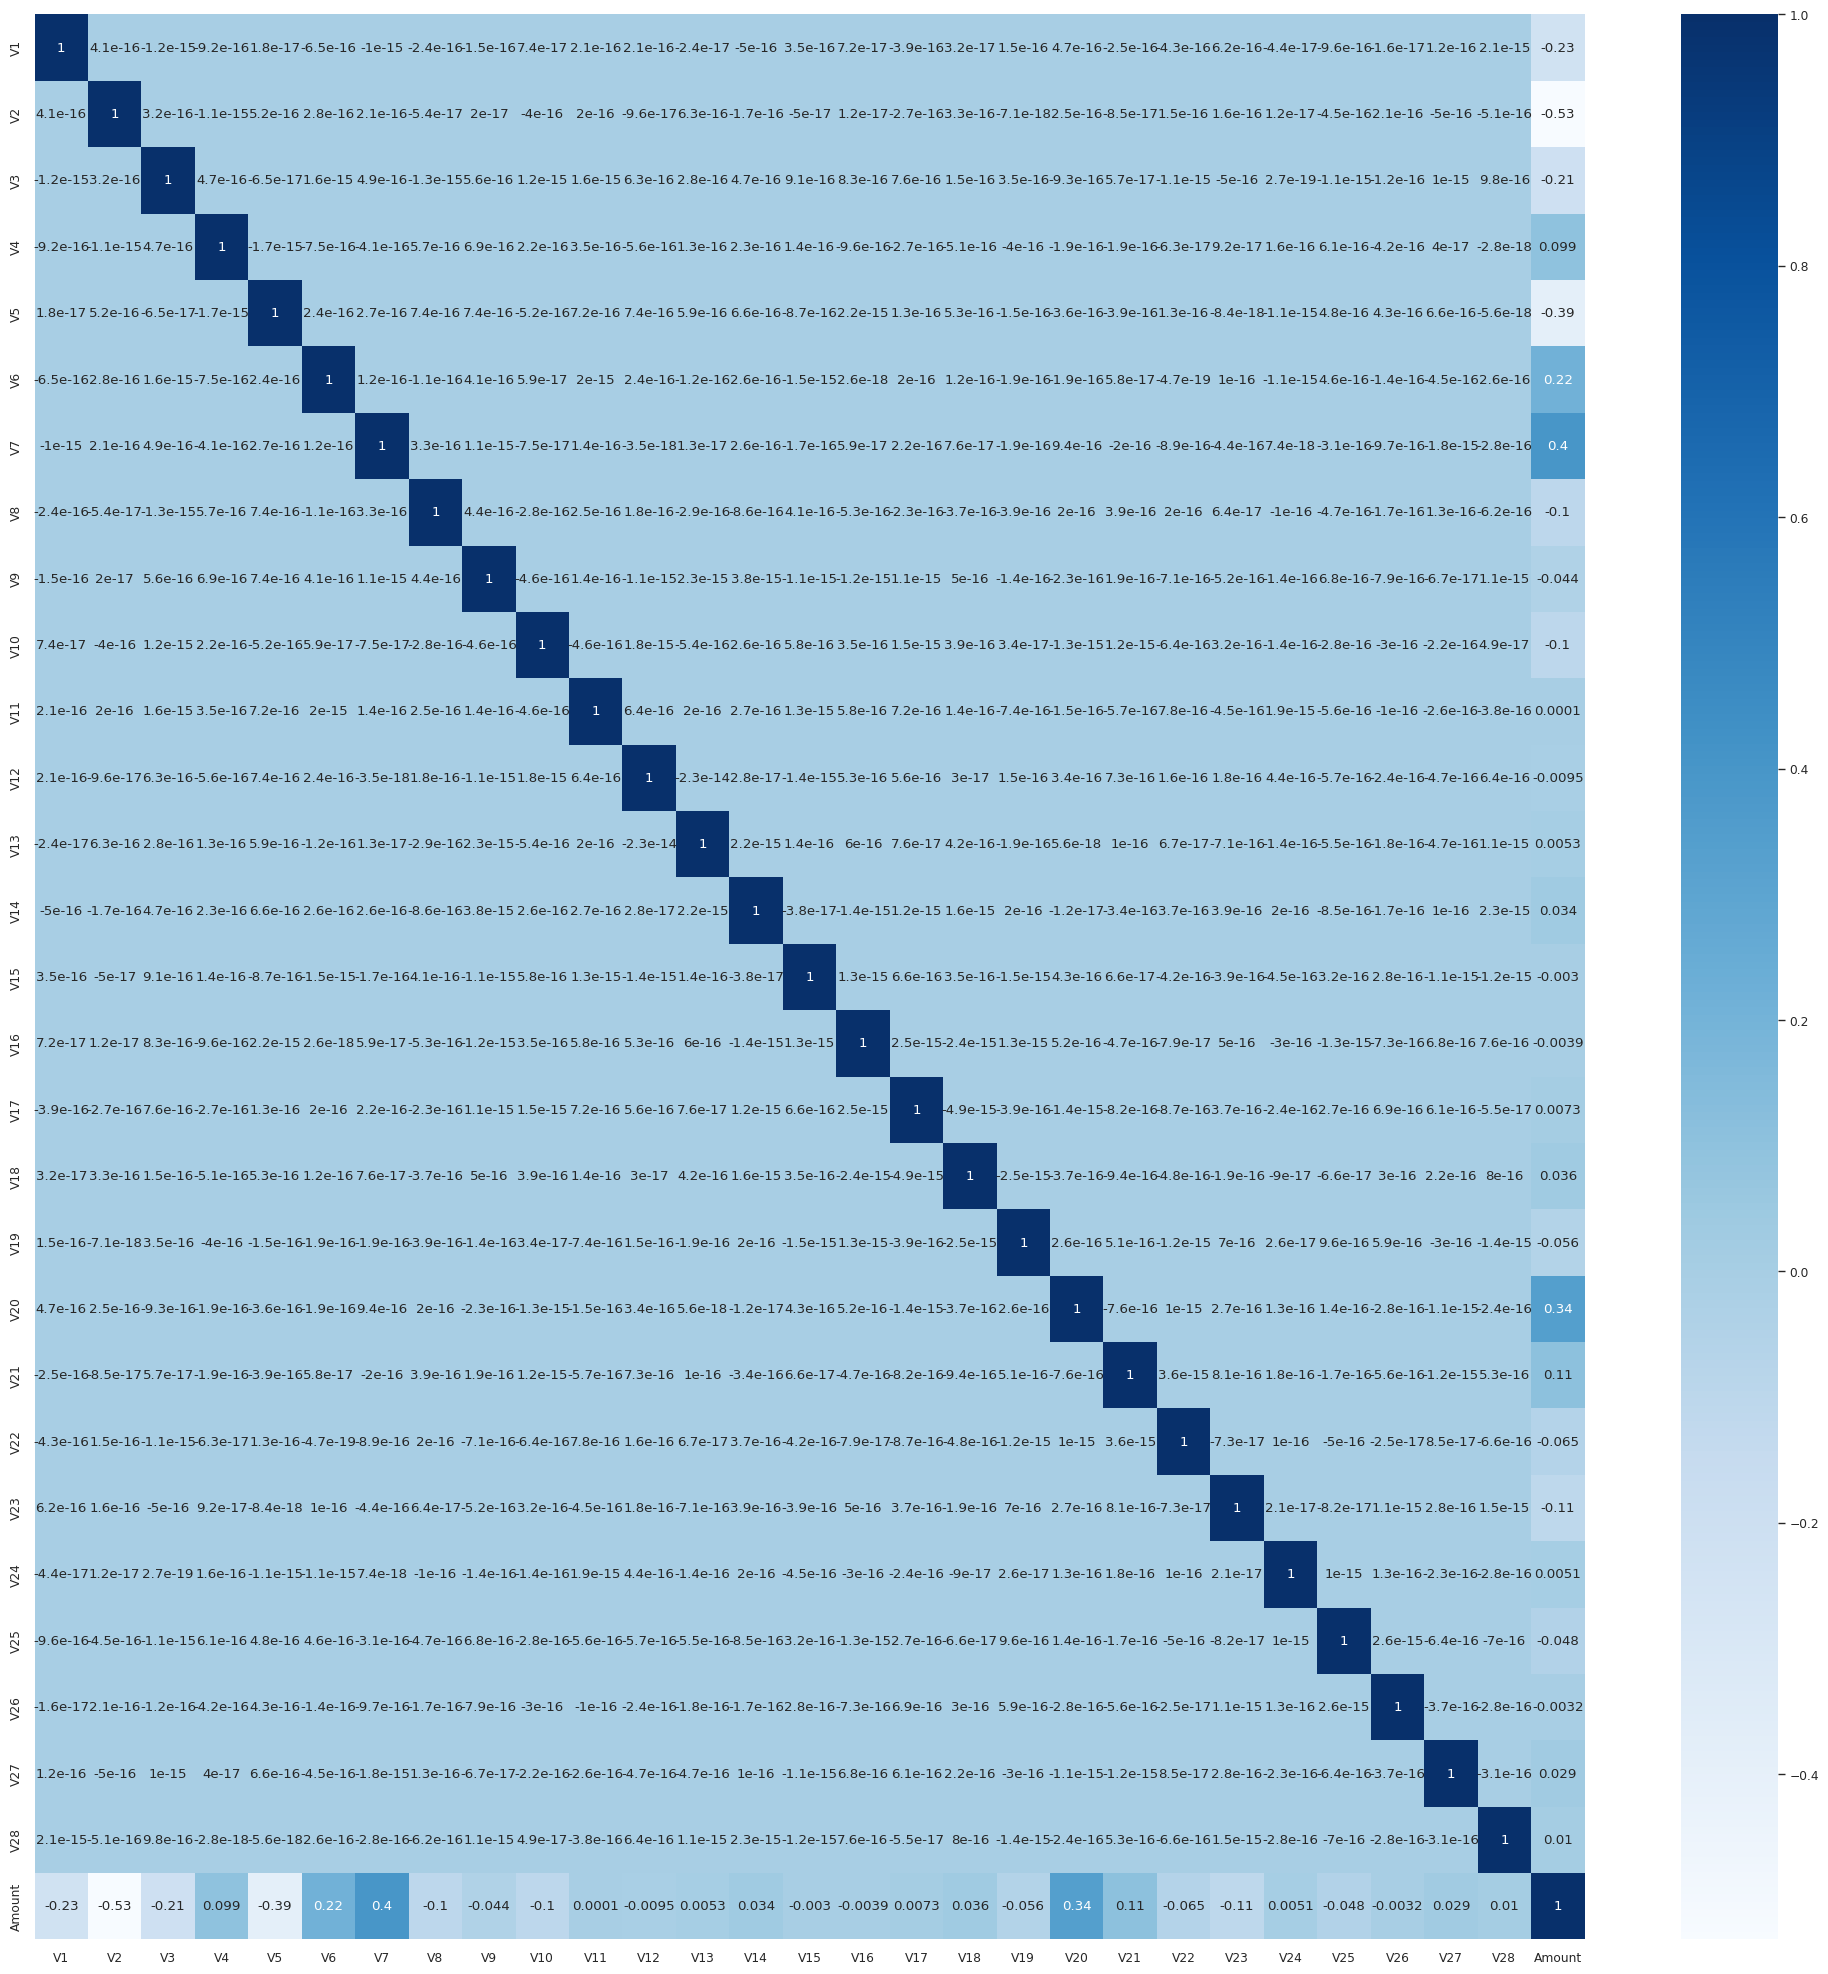

In [13]:
#heatmap for clear image of correlation
plt.figure(figsize = (25, 25))
sns.heatmap(df.iloc[:, : -1].corr(), annot = True, cbar = True, cmap = "Blues")

# Data Preprocessing

In [14]:
#removing the duplicated column
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [15]:
# Separate the columns to be scaled and the column to exclude
columns_to_scale = df.columns.difference(['Class'])
df_to_scale = df[columns_to_scale]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=columns_to_scale)

# Concatenate the scaled columns with the excluded column
df_final = pd.concat([df_scaled, df[['Class']]], axis=1)

In [16]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,4.36,-1.59,2.71,-0.69,4.63,-0.92,1.11,1.99,0.51,-0.68,1.48,0.21,0.11,1.01,-0.51,1.44,0.25,0.94,0.82,0.77,0
284803,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,-0.98,-0.15,0.92,1.21,-0.68,1.16,-0.71,-0.03,-1.22,-1.55,0.06,0.21,0.92,0.01,-1.02,-0.61,-0.40,0.07,-0.05,24.79,0
284804,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,-0.48,0.41,0.06,-0.18,-0.51,1.33,0.14,0.31,0.40,-0.58,0.00,0.23,0.58,-0.04,0.64,0.27,-0.09,0.00,-0.03,67.88,0
284805,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,-0.40,-1.93,-0.96,-1.04,0.45,1.96,-0.61,0.51,1.11,2.90,0.13,0.27,0.80,-0.16,0.12,-0.57,0.55,0.11,0.10,10.00,0


# Modelling

In [17]:
#split data into features and target
X = df.drop(columns=['Class'])
y = df['Class']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampling and undersampling strategies
smote = SMOTE(random_state=42)
tomek = TomekLinks()

# Create a pipeline that first applies SMOTE and then Tomek Links
pipeline = Pipeline(steps=[('o', smote), ('u', tomek)])

# Fit and transform the training data
X_train, y_train = pipeline.fit_resample(X_train, y_train)

#instantiate classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#fit models and generate classification reports
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.39      0.79      0.52        91

    accuracy                           1.00     55133
   macro avg       0.70      0.89      0.76     55133
weighted avg       1.00      1.00      1.00     55133


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.83      0.80      0.82        91

    accuracy                           1.00     55133
   macro avg       0.91      0.90      0.91     55133
weighted avg       1.00      1.00      1.00     55133


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.28      0.81      0.42        91

    accuracy                           1.00     55133
   macro 